**What is Feature Engineering?**
 
            Feature engineering is the process of creating new features or modifying existing ones to improve the performance of machine learning models. It involves techniques like feature extraction, transformation, encoding, and scaling to make data more useful for predictions.
 
**Why Do We Need Feature Engineering?**
 
1.**Improves Model Performance** – Good features help models make better predictions.
 
2.**Reduces Overfitting** – Helps eliminate noise and irrelevant data.
 
3.**Handles Missing Data** – Creates meaningful replacements for missing values.
 
4.**Enables Better Interpretability** – Makes features more understandable and useful.

5.**Reduces Dimensionality** – Helps remove unnecessary data points, making the model efficient.
 

In [1]:
#Extract Date & Time features

import pandas as pd

#Sample dataset
df = pd.DataFrame({'TransactionDate': pd.to_datetime(['2025-02-05 14:30:00', '2025-02-06 18:45:00'])})

#Extract date-related features
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek #Monday=0, Sunday=6
df['Hour'] = df['TransactionDate'].dt.hour #Extract hour
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x:1 if x>=5 else 0) #weekend flag
print(df)
#Why? Helps capture behavioural trends (e.g., shopping habits on weekends Vs weekdays)

      TransactionDate  DayOfWeek  Hour  IsWeekend
0 2025-02-05 14:30:00          2    14          0
1 2025-02-06 18:45:00          3    18          0


In [2]:
#Aggregated Features
#Find average transaction amount per user:
df_transactions = pd.DataFrame({
    'UserID' : [101, 102, 101, 103, 102],
    'TransactionAmount' : [500, 300, 700, 1000, 400]
})

df_user_avg = df_transactions.groupby('UserID')['TransactionAmount'].mean().reset_index()
df_user_avg.rename(columns={'TransactionAmount': 'AvgTransactionAmount'}, inplace=True)
print(df_user_avg)
#why? Identifies high_values csutomers and spending patterns

   UserID  AvgTransactionAmount
0     101                 600.0
1     102                 350.0
2     103                1000.0


In [3]:
#Encoding categorical variables
#convert product (Electronics,clothing) into numerical form:
from sklearn.preprocessing import OneHotEncoder
df=pd.DataFrame({'ProductCategory':['Electronics','Clothing','Clothing','Grocery']})
encoder=OneHotEncoder(sparse_output=False)
encoded_features=encoder.fit_transform(df[['ProductCategory']])
df_encoded=pd.DataFrame(encoded_features,columns=encoder.get_feature_names_out())
print(df_encoded)

#Why? Converts non-numeric categories into a format suitable for ML models.

   ProductCategory_Clothing  ProductCategory_Electronics  \
0                       0.0                          1.0   
1                       1.0                          0.0   
2                       1.0                          0.0   
3                       0.0                          0.0   

   ProductCategory_Grocery  
0                      0.0  
1                      0.0  
2                      0.0  
3                      1.0  


In [4]:
#log transformtion for skewed data
#if transactionAmount has outliers, apply log transformation:
import numpy as np
df = pd.DataFrame({'TransactionAmount': [100, 200, 5000, 10000, 20000]})
df['LogTransactionAmount'] = np.log1p(df['TransactionAmount']) #log1p avoids log(0) issues
print(df)

#Why? Reduces skewness and impact of outliers

   TransactionAmount  LogTransactionAmount
0                100              4.615121
1                200              5.303305
2               5000              8.517393
3              10000              9.210440
4              20000              9.903538


In [5]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
df['NormalizedTransactionAmount']=scaler.fit_transform(df[['TransactionAmount']])
standard_scaler=StandardScaler()
df['StandardizedTransactionAmount']=standard_scaler.fit_transform(df[['TransactionAmount']])
print(df)
#why?Ensures all features have the same scale,preventing bias in Ml MODELS.

   TransactionAmount  LogTransactionAmount  NormalizedTransactionAmount  \
0                100              4.615121                     0.000000   
1                200              5.303305                     0.005025   
2               5000              8.517393                     0.246231   
3              10000              9.210440                     0.497487   
4              20000              9.903538                     1.000000   

   StandardizedTransactionAmount  
0                      -0.937070  
1                      -0.923606  
2                      -0.277351  
3                       0.395831  
4                       1.742196  


**Final Summary of Feature Engineering & Imbalanced Data Handling**
 
Feature Extraction : Extract new insights from raw data (e.g., Hour, DayOfWeek)
 
Aggregated Features : Calculate meaningful statistics (e.g., AvgTransactionAmountPerUser)
 
Encoding : Convert categorical variables into numerical (One-Hot Encoding)
 
Log Transformation : Reduce skewness in data distribution
 
Feature Scaling : Normalize numerical features for better model performance
 
Downsampling: Reduce the size of the majority class
 
Upsampling : Increase the size of the minority class
 
SMOTE(Synthetic Minority Over-sampling Technique) : Generate synthetic samples for the minority class

**Insights from "flight_price.xlsx"**
**Dataset Overview**

Total Rows: 10,683
 
Total Columns: 11
 
Data Types:
 
10 categorical (object) columns
 
1 numerical (integer) column (Price)

### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

**Column Breakdown:**
 
Airline – Name of the airline (e.g., IndiGo, Air India, Jet Airways)
 
Date_of_Journey – The flight's departure date
 
Source – Flight departure location
 
Destination – Flight arrival location
 
Route – Flight path (e.g., BLR → DEL)
 
Dep_Time – Flight departure time
 
Arrival_Time – Flight arrival time
 
Duration – Total travel duration (e.g., "2h 50m")
 
Total_Stops – Number of stops (e.g., "non-stop", "1 stop", "2 stops")
 
Additional_Info – Extra details (e.g., "No info")
 
Price – Flight ticket price (numeric)

In [6]:
#importing basics libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#define the file path
df = pd.read_csv('flight_price(Sheet1).csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
##feature engineering
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [12]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [14]:
#Drop date of journey

df.drop('Date_of_Journey', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [15]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(' ')[0])
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min'] = df['Arrival_Time'].str.split(':').str[1]
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Arrival_hour     10683 non-null  object
 14  Arrival_min      10683 non-null  object
dtypes: int32(3), int64(1), object(11)
memory usage: 1.1+ MB


In [17]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_min'] = df['Arrival_min'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [18]:
df.drop('Arrival_Time', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Arrival_hour     10683 non-null  int32 
 13  Arrival_min      10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [20]:
df['Dep_Time'] = df['Dep_Time'].apply(lambda x : x.split(' ')[0])
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_min'] = df['Dep_Time'].str.split(':').str[1]
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Arrival_hour     10683 non-null  int32 
 13  Arrival_min      10683 non-null  int32 
 14  Dep_hour         10683 non-null  object
 15  Dep_min          10683 non-null  object
dtypes: int32(5), int64(1), object(10)
memory usage: 1.1+ MB


In [22]:
df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_min'] = df['Dep_min'].astype(int)
df.drop('Dep_Time', axis=1, inplace=True)
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Arrival_hour     10683 non-null  int32 
 12  Arrival_min      10683 non-null  int32 
 13  Dep_hour         10683 non-null  int32 
 14  Dep_min          10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB
None


In [23]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [24]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [25]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [26]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [27]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [28]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min


In [ ]:
df.drop('Route',axis=1,inplace=True)

In [31]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

In [33]:
df['Source'].unique()
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [35]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)  
categorical_cols = ['Airline', 'Source', 'Destination']

df[categorical_cols] = df[categorical_cols].fillna("Unknown")
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_cols = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

encoded_cols.index = df.index    
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_cols], axis=1)

print(df.head())


  Duration  Total_Stops Additional_Info  Price  Date  Month  Year  \
0   2h 50m            0         No info   3897    24      3  2019   
1   7h 25m            2         No info   7662     1      5  2019   
2      19h            2         No info  13882     9      6  2019   
3   5h 25m            1         No info   6218    12      5  2019   
4   4h 45m            1         No info  13302     1      3  2019   

   Arrival_hour  Arrival_min  Dep_hour  ...  Airline_Vistara Premium economy  \
0             1           10        22  ...                              0.0   
1            13           15         5  ...                              0.0   
2             4           25         9  ...                              0.0   
3            23           30        18  ...                              0.0   
4            21           35        16  ...                              0.0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0             0.0           0.0       

In [40]:
df.head()

,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,No info,3897,24,3,2019,1,10,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7h 25m,2,No info,7662,1,5,2019,13,15,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19h,2,No info,13882,9,6,2019,4,25,9,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5h 25m,1,No info,6218,12,5,2019,23,30,18,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4h 45m,1,No info,13302,1,3,2019,21,35,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [44]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_additional_info = pd.DataFrame(
    encoder.fit_transform(df[['Additional_Info']]),
    columns=encoder.get_feature_names_out(['Additional_Info'])
)

encoded_additional_info.index = df.index
df.drop(columns=['Additional_Info'], inplace=True)
df = pd.concat([df, encoded_additional_info], axis=1)

print(df.head())


  Duration  Total_Stops  Price  Date  Month  Year  Arrival_hour  Arrival_min  \
0   2h 50m            0   3897    24      3  2019             1           10   
1   7h 25m            2   7662     1      5  2019            13           15   
2      19h            2  13882     9      6  2019             4           25   
3   5h 25m            1   6218    12      5  2019            23           30   
4   4h 45m            1  13302     1      3  2019            21           35   

   Dep_hour  Dep_min  ...  Destination_New Delhi  \
0        22       20  ...                    1.0   
1         5       50  ...                    0.0   
2         9       25  ...                    0.0   
3        18        5  ...                    0.0   
4        16       50  ...                    1.0   

   Additional_Info_1 Short layover  Additional_Info_2 Long layover  \
0                              0.0                             0.0   
1                              0.0                             0.0

In [45]:
df.head()

,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,2h 50m,0,3897,24,3,2019,1,10,22,20,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7h 25m,2,7662,1,5,2019,13,15,5,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,19h,2,13882,9,6,2019,4,25,9,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5h 25m,1,6218,12,5,2019,23,30,18,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4h 45m,1,13302,1,3,2019,21,35,16,50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


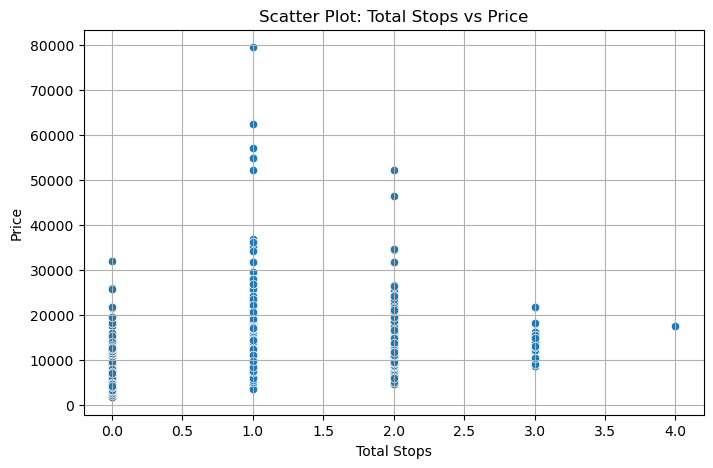

In [46]:
# Scatter Plot: Total_Stops vs Price (or another numeric column)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Total_Stops'], y=df['Price'])  # Replace 'Price' with the target variable
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.title("Scatter Plot: Total Stops vs Price")
plt.grid(True)
plt.show()